## Activity 5 - Principal Component Analysis (PCA) to a biomedical dataset

### Import Libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import numpy as np
from sklearn.pipeline import Pipeline
from scipy.stats import zscore

### Loading Dataset

In [33]:
# Enter full directory to load the .csv in submission file

# Dataset loaded into a pandas DataFrame

try:
    file_path = "heart_disease.csv"
    data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"The file at {file_path} does not exist. Please check the file path and try again.")
    data = None
except pd.errors.EmptyDataError:
    print(f"The file at {file_path} is empty. Please provide a valid data file.")
    data = None
except Exception as e:
    print(f"An unexpected error occurred while loading the file: {e}")
    data = None

# Ensuring valid dataset 

if data is not None:
# Displaying the first five rows of the dataset
    print(data.head())
    print("\n")

   Gender  age      education  currentSmoker  cigsPerDay  BPMeds   
0    Male   39   postgraduate              0         0.0     0.0  \
1  Female   46  primaryschool              0         0.0     0.0   
2    Male   48     uneducated              1        20.0     0.0   
3  Female   61       graduate              1        30.0     0.0   
4  Female   46       graduate              1        23.0     0.0   

  prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI   
0              no             0         0    195.0  106.0   70.0  26.97  \
1              no             0         0    250.0  121.0   81.0  28.73   
2              no             0         0    245.0  127.5   80.0  25.34   
3              no             1         0    225.0  150.0   95.0  28.58   
4              no             0         0    285.0  130.0   84.0  23.10   

   heartRate  glucose Heart_ stroke  
0       80.0     77.0            No  
1       95.0     76.0            No  
2       75.0     70.0     

### Preprocessing of Dataset

In [28]:
# Processing steps applied ensuring integrity of dataset

numerical_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
categorical_cols = ['Gender', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'Heart_ stroke']


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

Final_preprocessed = preprocessor.fit_transform(data)


### Implementing PCA

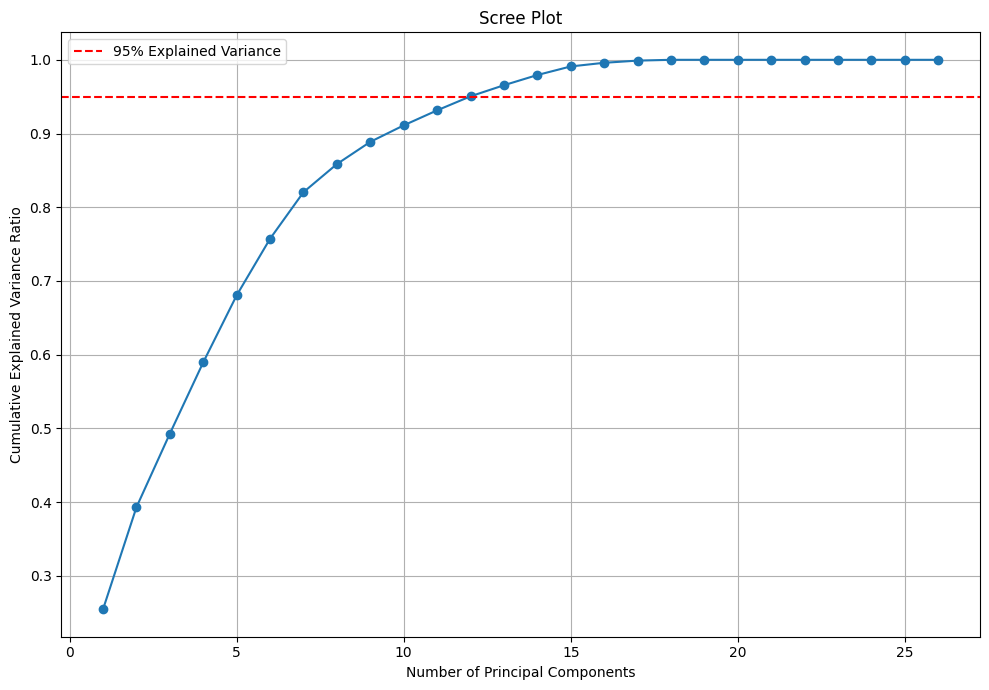

In [29]:
pca = PCA()
pca.fit(Final_preprocessed)

explained_variance_ratio = pca.explained_variance_ratio_

# The cumulative variance explained 
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Visual used to assess
plt.figure(figsize=(10,7))
plt.plot(range(1, len(cumulative_explained_variance)+1), cumulative_explained_variance, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Explained variance ratio: [0.25479835 0.13834493]


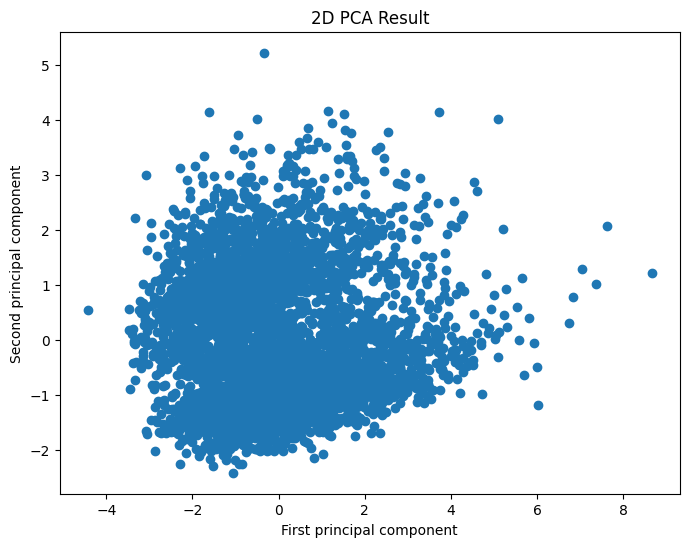

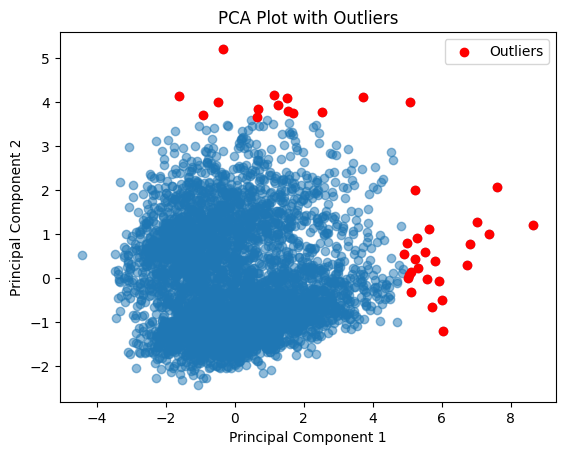

In [31]:
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(Final_preprocessed)

explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained variance ratio: {explained_variance_ratio}')

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('2D PCA Result')
plt.show()


z_scores = np.abs(zscore(X_pca))
# A commonly used threshold allocated for visual 
threshold = 3

outliers = np.where(np.any(z_scores > threshold, axis=1))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.scatter(X_pca[outliers, 0], X_pca[outliers, 1], color='r', label='Outliers')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot with Outliers')
plt.legend()

plt.show()
